# Proyecto Final



Importaremos las librerías comunes para iniciar con la limpieza de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Preparación de los datos

Primero cargaremos la data, le añadiremos las cabezeras faltantes y asignaremos NaN a todos los valores `?`.

In [2]:
data = pd.read_csv('mammographic_masses.data.txt',na_values=['?'], 
                    names = ["BI-RADS", "edad", "forma", "margen", "densidad", "gravedad"])

Ahora imprimeros a todas las filas que tengan valores NaN

In [3]:
data[data.isnull().any(1)]

BI-RADS  edad  forma  margen  densidad  gravedad
1        4.0  43.0    1.0     1.0       NaN         1
4        5.0  74.0    1.0     5.0       NaN         1
5        4.0  65.0    1.0     NaN       3.0         0
6        4.0  70.0    NaN     NaN       3.0         0
7        5.0  42.0    1.0     NaN       3.0         0
9        5.0  60.0    NaN     5.0       1.0         1
12       4.0  64.0    1.0     NaN       3.0         0
19       4.0  40.0    1.0     NaN       NaN         0
20       NaN  66.0    NaN     NaN       1.0         1
22       4.0  43.0    1.0     NaN       NaN         0
26       2.0  66.0    1.0     1.0       NaN         0
27       5.0  63.0    3.0     NaN       3.0         0
35       4.0  77.0    3.0     NaN       NaN         0
38       4.0  48.0    4.0     5.0       NaN         1
40       4.0  59.0    2.0     1.0       NaN         0
43       4.0  61.0    2.0     1.0       NaN         0
45       5.0  44.0    2.0     4.0       NaN         1
47       4.0  23.0    1.0     1.0       NaN         0
48       2.0  42.0    NaN     NaN       4.0         0
52       4.0  23.0    1.0     1.0       NaN         0
53       4.0  63.0    2.0     1.0       NaN         0
54       4.0  53.0    NaN     5.0       3.0         1
55       4.0  43.0    3.0     4.0       NaN         0
57       5.0  51.0    2.0     4.0       NaN         0
58       4.0  45.0    2.0     1.0       NaN         0
59       5.0  59.0    2.0     NaN       NaN         1
63       3.0  57.0    2.0     1.0       NaN         0
65       4.0  25.0    2.0     1.0       NaN         0
67       5.0  72.0    4.0     3.0       NaN         1
74       5.0  70.0    NaN     4.0       NaN         1
..       ...   ...    ...     ...       ...       ...
496      4.0  82.0    NaN     5.0       3.0         1
501      5.0  59.0    4.0     4.0       NaN         1
519      3.0  68.0    NaN     NaN       3.0         0
520      4.0  62.0    4.0     NaN       3.0         1
521      5.0  65.0    1.0     NaN       3.0         1
531      4.0  55.0    NaN     NaN       3.0         0
537      5.0  63.0    NaN     4.0       3.0         1
541      4.0  49.0    2.0     NaN       3.0         0
554      5.0  70.0    NaN     5.0       3.0         1
561      2.0  59.0    NaN     4.0       3.0         0
569      4.0  64.0    3.0     4.0       NaN         1
574      4.0  60.0    3.0     NaN       NaN         0
581      2.0  65.0    NaN     1.0       2.0         0
614      3.0  46.0    NaN     5.0       NaN         1
627      4.0  57.0    2.0     1.0       NaN         0
660      4.0  58.0    NaN     4.0       3.0         1
661      4.0  51.0    NaN     4.0       3.0         0
662      3.0  50.0    NaN     NaN       3.0         1
665      4.0  27.0    2.0     1.0       NaN         0
677      4.0  57.0    4.0     4.0       NaN         1
683      5.0   NaN    3.0     3.0       3.0         1
691      4.0  72.0    3.0     NaN       3.0         0
723      4.0  60.0    3.0     NaN       4.0         0
745      6.0  76.0    3.0     NaN       3.0         0
752      5.0  48.0    NaN     4.0       NaN         1
778      4.0  60.0    NaN     4.0       3.0         0
819      4.0  35.0    3.0     NaN       2.0         0
824      6.0  40.0    NaN     3.0       4.0         1
884      5.0   NaN    4.0     4.0       3.0         1
923      5.0   NaN    4.0     3.0       3.0         1

[131 rows x 6 columns]

Se puede ver que existen 131 filas con valores NaN. Estos valores no nos sirven para el análisis así que las eliminaremos.

In [4]:
data.dropna(inplace=True)

Ahora ya no existe ninguna fila con algún valor NaN.

In [5]:
data[data.isnull().any(axis=1)].shape[0]

0

Ahora revisaremos si los valores se encuentran en los rangos permitidos.

In [6]:
data.describe()

BI-RADS        edad       forma      margen    densidad    gravedad
count  830.000000  830.000000  830.000000  830.000000  830.000000  830.000000
mean     4.393976   55.781928    2.781928    2.813253    2.915663    0.485542
std      1.888371   14.671782    1.242361    1.567175    0.350936    0.500092
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   46.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000    1.000000

Se puede ver que algunos valores de `BI-RADS` no se encuentran en el rango permitido(1-5). Puesto que existen valores de 55 y 0. Veamos cuántos valores están fueran del rango.

In [7]:
data[data["BI-RADS"].gt(5) | data["BI-RADS"].lt(1)]

BI-RADS  edad  forma  margen  densidad  gravedad
340     55.0  46.0    4.0     3.0       3.0         1
456      0.0  69.0    4.0     5.0       3.0         1
533      0.0  58.0    4.0     4.0       3.0         0
550      6.0  80.0    4.0     5.0       3.0         1
664      6.0  60.0    3.0     5.0       3.0         1
692      6.0  51.0    4.0     4.0       3.0         1
707      6.0  41.0    2.0     1.0       3.0         0
717      6.0  71.0    4.0     4.0       3.0         1
718      6.0  68.0    4.0     3.0       3.0         1
784      6.0  63.0    1.0     1.0       3.0         0
799      0.0  72.0    4.0     3.0       3.0         1
832      6.0  72.0    4.0     3.0       3.0         1
889      6.0  41.0    3.0     3.0       2.0         1
893      0.0  45.0    2.0     4.0       3.0         0
950      0.0  71.0    4.0     4.0       3.0         1

Se puede ver que existen valores de 0, 6 y 55. Lo que haremos ahora será acotar estos valores dentro del rango permitido.

In [8]:
data["BI-RADS"].values[data["BI-RADS"].gt(5)] = 5
data["BI-RADS"].values[data["BI-RADS"].lt(1)] = 1

Ahora se puede ver que no existen valores `BI-RADS` fuera dle rango.

In [9]:
data[data["BI-RADS"].gt(5) | data["BI-RADS"].lt(1)].shape[0]

0

In [10]:
data.describe()

BI-RADS        edad       forma      margen    densidad    gravedad
count  830.000000  830.000000  830.000000  830.000000  830.000000  830.000000
mean     4.328916   55.781928    2.781928    2.813253    2.915663    0.485542
std      0.633985   14.671782    1.242361    1.567175    0.350936    0.500092
min      1.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   46.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max      5.000000   96.000000    4.000000    5.000000    4.000000    1.000000

Ahora la data está lista para poder hacer el análisis exploratorio.

## Análisis exploratorio

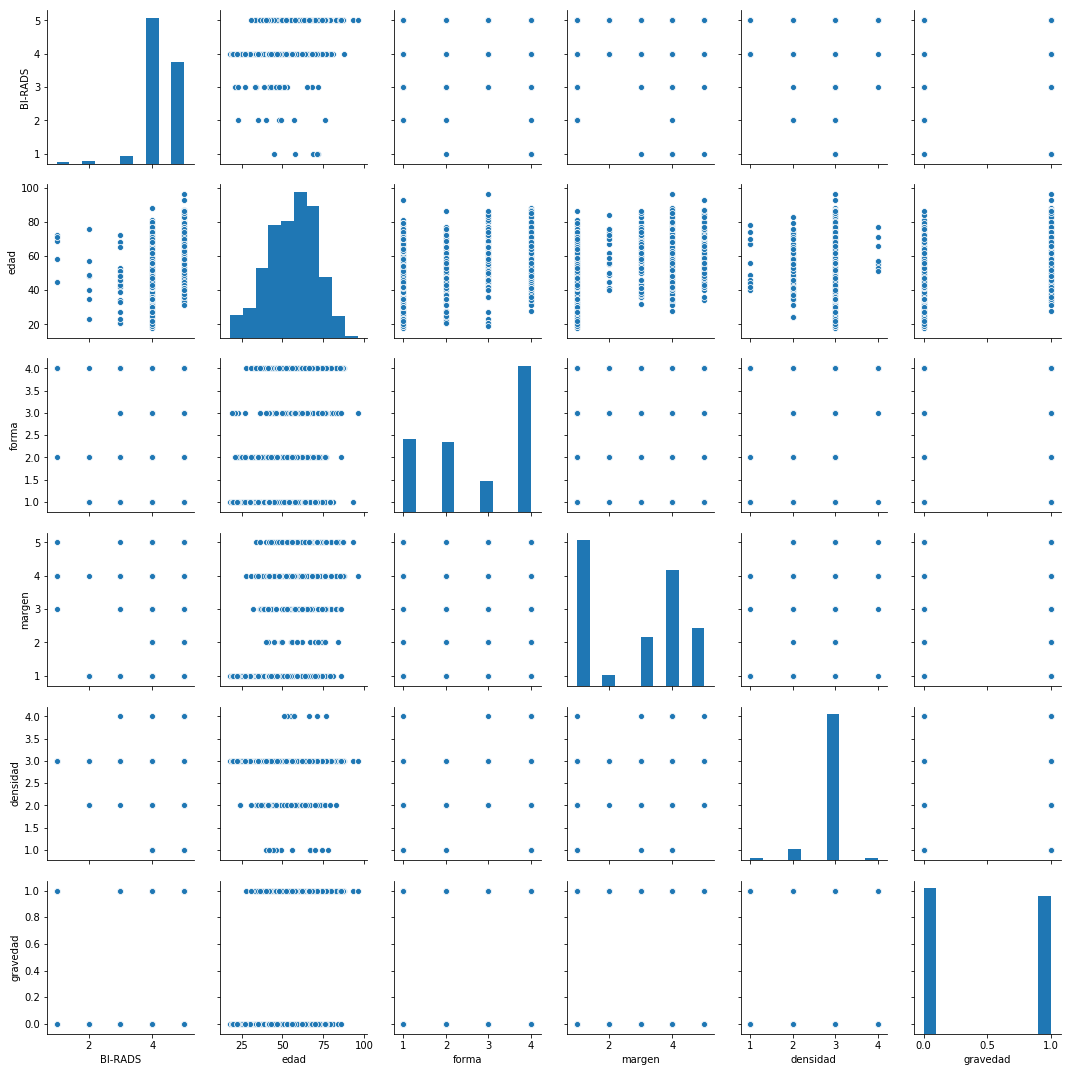

In [11]:
sns.pairplot(data)

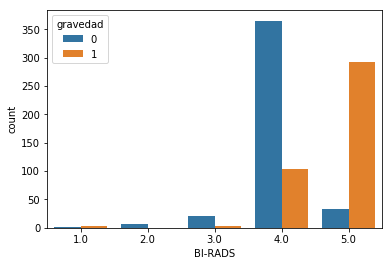

In [12]:
sns.countplot(x='BI-RADS', hue='gravedad', data=data)

## Modelo de Regresión Logística

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

x = data[['BI-RADS', 'edad', 'forma']]
y = data['gravedad']

log = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [14]:
log.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
predict = log.predict(x_test)

In [16]:
print(accuracy_score(y_test, predict))

0.8269230769230769


In [17]:
print(confusion_matrix(y_test, predict))

[[88 19]
 [17 84]]


## SVM: Máquina con Vectores de Soporte

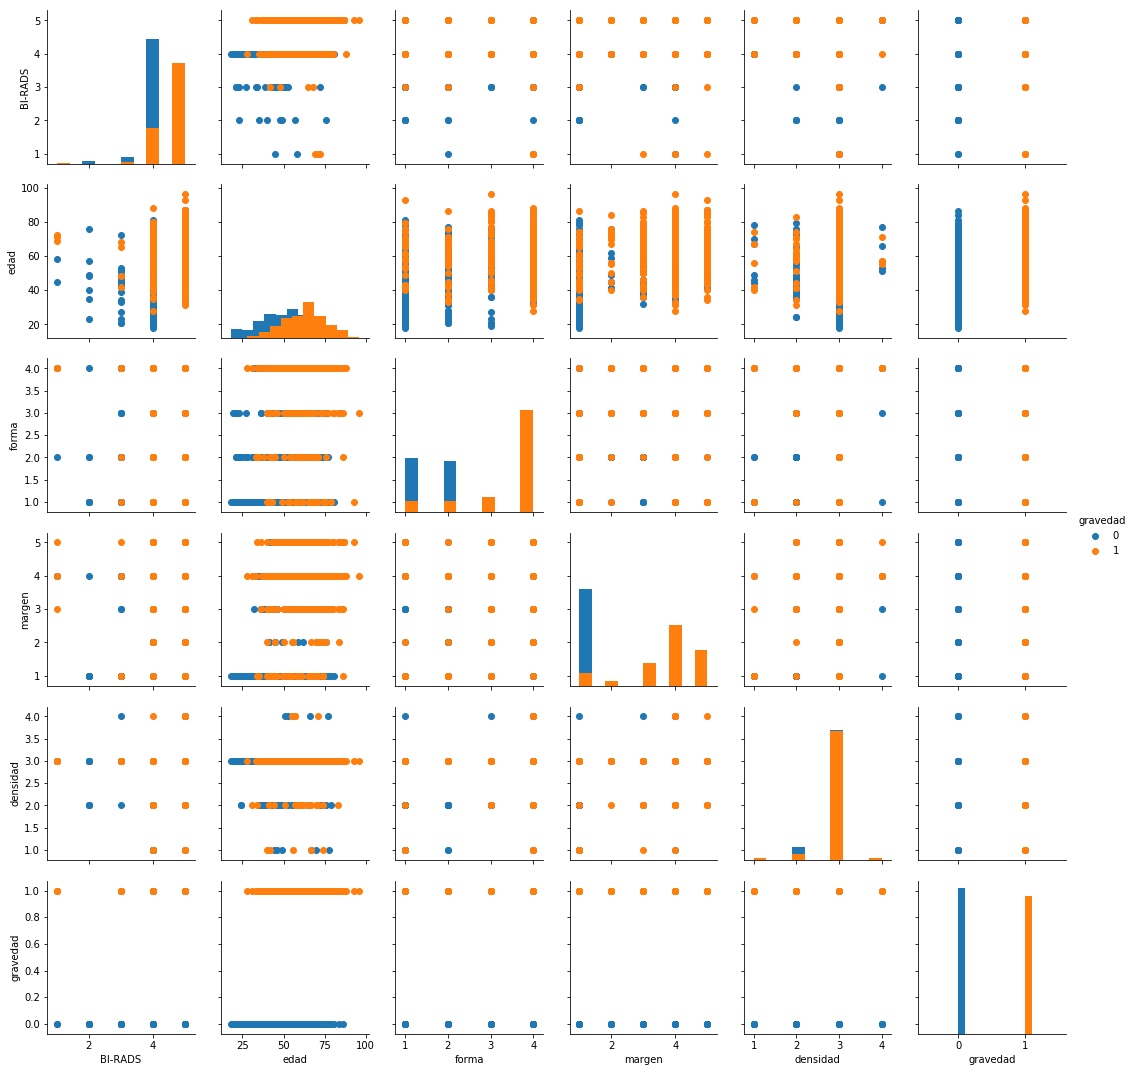

In [18]:
g = sns.PairGrid(data, hue="gravedad")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

#### Dividiremos los datos en un conjunto de entrenamiento y prueba

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('gravedad',axis=1))
X_train, X_test, y_train, y_test = train_test_split(scaler.transform(data.drop('gravedad', axis=1)), data['gravedad'], test_size=0.30, random_state=70)

## Llamamos al modelo SVC desde sklearn con el kernel rbf y ajustamos el modelo a los datos de entrenamiento

In [20]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Obtenemos predicciones del modelo y creamos una matriz de confusión y un informe de clasificación

In [21]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[111  16]
 [ 21 101]]


In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       127
           1       0.86      0.83      0.85       122

   micro avg       0.85      0.85      0.85       249
   macro avg       0.85      0.85      0.85       249
weighted avg       0.85      0.85      0.85       249



#### Importaremos GridsearchCV de SciKit Learn

In [23]:
from sklearn.model_selection import GridSearchCV

#### Crearemos un diccionario llamado param_grid y completaremos algunos parámetros para C y gamma.

In [24]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

#### Crearemos un objeto GridSearchCV y lo ajustaremos a los datos de entrenamiento.

In [25]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] .................................. C=1000, gamma=1, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] .................................. C=1000, gamma=1, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................................ C=1000, gamma=0.1, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................................ C=1000, gamma=0.1, total=   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................................ C=1000, gamma=0.1, total=   0.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ............................... C=1000, gamma=0.01, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ............................... C=1000, gamma=0.01, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

#### Crearemos algunas predicciones, informes de clasificación y matrices de confusión

In [26]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[109  18]
 [ 22 100]]


In [27]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       127
           1       0.85      0.82      0.83       122

   micro avg       0.84      0.84      0.84       249
   macro avg       0.84      0.84      0.84       249
weighted avg       0.84      0.84      0.84       249



## Ahora usaremos el kernel sigmoid en SVC y repetiremos los pasos anteriores

In [28]:
model = SVC(kernel='sigmoid')
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Obtenemos predicciones del modelo y creamos una matriz de confusión y un informe de clasificación

In [29]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[92 35]
 [28 94]]


In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       127
           1       0.73      0.77      0.75       122

   micro avg       0.75      0.75      0.75       249
   macro avg       0.75      0.75      0.75       249
weighted avg       0.75      0.75      0.75       249



#### Crearemos un objeto GridSearchCV con el kernel sigmoid y lo ajustaremos a los datos de entrenamiento.

In [32]:
grid = GridSearchCV(SVC(kernel='sigmoid'),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] .............................. C=1000, gamma=0.001, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .............................. C=1000, gamma=0.001, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ............................. C=1000, gamma=0.0001, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ............................. C=1000, gamma=0.0001, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ............................. C=1000, gamma=0.0001, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

#### Crearemos algunas predicciones, informes de clasificación y matrices de confusión

In [33]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[106  21]
 [ 20 102]]


In [34]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       127
           1       0.83      0.84      0.83       122

   micro avg       0.84      0.84      0.84       249
   macro avg       0.84      0.84      0.84       249
weighted avg       0.84      0.84      0.84       249



## Ahora usaremos el kernel poly en SVC y repetiremos los pasos anteriores

In [35]:
model = SVC(kernel='poly')
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Obtenemos predicciones del modelo y creamos una matriz de confusión y un informe de clasificación

In [36]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[110  17]
 [ 29  93]]


In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       127
           1       0.85      0.76      0.80       122

   micro avg       0.82      0.82      0.82       249
   macro avg       0.82      0.81      0.81       249
weighted avg       0.82      0.82      0.81       249



#### Crearemos un objeto GridSearchCV con el kernel poly y lo ajustaremos a los datos de entrenamiento.

In [38]:
grid = GridSearchCV(SVC(kernel='poly'),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] .................................. C=1000, gamma=1, total= 1.9min
[CV] C=1000, gamma=1 .................................................
[CV] .................................. C=1000, gamma=1, total= 2.1min
[CV] C=1000, gamma=1 .................................................
[CV] .................................. C=1000, gamma=1, total= 1.5min
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................................ C=1000, gamma=0.1, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................................ C=1000, gamma=0.1, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................................ C=1000, gamma=0.1, total=   0.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ............................... C=1000, gamma=0.01, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  6.6min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

#### Crearemos algunas predicciones, informes de clasificación y matrices de confusión

In [39]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[110  17]
 [ 29  93]]


In [40]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       127
           1       0.85      0.76      0.80       122

   micro avg       0.82      0.82      0.82       249
   macro avg       0.82      0.81      0.81       249
weighted avg       0.82      0.82      0.81       249

